# Central Limit Theorem - Lab

## Introduction

In this lab, we'll learn how to use the Central Limit Theorem to work with non-normally distributed datasets as if they were normally distributed.  

## Objectives

You will be able to:

* Use built-in methods to detect non-normal datasets
* Create a sampling distribution of sample means to demonstrate the central limit theorem

## Let's get started!

First, import the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
np.random.seed(0) #set a random seed for reproducibility

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

Next, read in the dataset.  A dataset of 10,000 numbers is stored in `non_normal_dataset.csv`. Use pandas to read the data into a series.

**_Hint:_** Any of the `read_` methods in pandas will store 1-dimensional in a Series instead of a DataFrame if passed the optimal parameter `squeeze=True`.

In [8]:
df = pd.read_csv('non_normal_dataset.csv')
df.head(40)

,3
0,5
1,3
2,3
3,1
4,13
5,14
6,18
7,28
8,15
9,11


## Detecting Non-Normal Datasets

Before we can make use of the normal distribution, we need to first confirm that our data is normally distributed.  If it is not, then we'll need to use the Central Limit Theorem to create a sampling distribution of sample means that will be normally distributed.  

There are two main ways to check if a sample follows the normal distribution or not.  The easiest is to simply plot the data and visually check if the data follows a normal curve or not.  

In the cell below, use `seaborn`'s `distplot` method to visualize a histogram of the distribution overlaid with the probability density curve.  

c:\Users\Edwin George\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


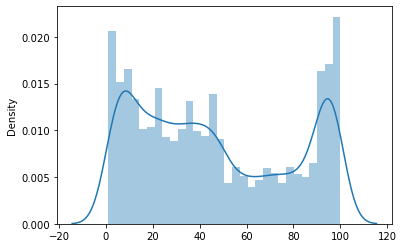

In [3]:
# Visualize the distribution of a specific column
sns.distplot(df, bins=30, kde=True)

# Show the plot
plt.show()

As expected, this dataset is not normally distributed.  

For a more formal way to check if a dataset is normally distributed or not, we can make use of a statistical test.  There are many different statistical tests that can be used to check for normality, but we'll keep it simple and just make use of the `normaltest()` function from `scipy.stats`, which we imported as `st` --see the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) if you have questions about how to use this method. 

In the cell below, use `normaltest()` to check if the dataset is normally distributed.  

In [4]:
# Perform the normality test on a specific column (replace 'column_name' with actual column)
stat, p_value = st.normaltest(df)

# Print the results
print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected. The data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. The data follows a normal distribution.")


Statistic: [43432.81112653], p-value: [0.]
The null hypothesis is rejected. The data is not normally distributed.


The output may seem a bit hard to interpret since we haven't covered hypothesis testing and p-values in further detail yet.  However, the function tests the hypothesis that the distribution passed into the function differs from the normal distribution. The null hypothesis would then be that the data *is* normally distributed. We typically reject the null hypothesis if the p-value is less than 0.05. For now, that's all you need to remember--this will make more sense once you work with p-values more which you'll do subsequently.  

Since our dataset is non-normal, that means we'll need to use the **_Central Limit Theorem._**

## Sampling With Replacement

In order to create a Sampling Distribution of Sample Means, we need to first write a function that can sample *with* replacement.  

In the cell below, write a function that takes in an array of numbers `data` and a sample size `n` and returns an array that is a random sample of `data`, of size `n`. Additionally, we've added a marker for random seed for reproducability. 

In [5]:
def get_sample(df, n, seed):
    #Adding random seed for reproducibility
    np.random.seed(seed)
    
# Sampling with replacement
    sample = df.sample(n=n, replace=True, random_state=seed)
    
    return sample
    pass

test_sample = get_sample(df, 30, 0)
print(test_sample[:5]) 
# [56, 12, 73, 24, 8] (This will change if you run it multiple times)

       3
2732  56
9845  12
3264  73
4859  24
9225   8


## Generating a Sample Mean

Next, we'll write another helper function that takes in a sample and returns the mean of that sample.  

In [15]:
def get_sample_mean(sample):
    
    return np.mean(sample)

    pass

test_sample2 = get_sample(df, 30, 0)
test_sample2_mean = get_sample_mean(test_sample2)
print(test_sample2_mean) 
# 32.733333333333334

3    32.733333
dtype: float64


### Creating a Sampling Distribution of Sample Means

Now that we have helper functions to help us sample with replacement and calculate sample means, we just need to bring it all together and write a function that creates a sampling distribution of sample means!

In the cell below, write a function that takes in 3 arguments: the dataset, the size of the distribution to create, and the size of each individual sample. The function should return a sampling distribution of sample means of the given size.  

Make sure to include some way to change the seed as your function proceeds!

In [16]:
import numpy as np
import pandas as pd

def get_sample(data, n, seed):
    """Return a random sample of size n from the data with replacement."""
    np.random.seed(seed)
    return data.sample(n=n, replace=True)

def get_sample_mean(sample):
    """Return the mean of the sample."""
    return sample.mean()

def create_sample_distribution(df, dist_size=100, n=30):
    """
    Creates a sampling distribution of sample means.

    Parameters:
    df (DataFrame): The dataset to sample from.
    dist_size (int): The number of sample means to generate.
    n (int): The size of each individual sample.

    Returns:
    list: A list containing the sample means.
    """
    sample_means = []  # List to hold the sample means

    for i in range(dist_size):
        # Sample with replacement
        sample = get_sample(df, n, seed=i)  # Use the index as the seed for reproducibility
        sample_mean = get_sample_mean(sample)  # Calculate the mean of the sample
        sample_means.append(sample_mean)  # Append the mean to the list

    return sample_means  # Return the list of sample means

# Example usage
# Create a sample DataFrame
data = {'values': np.random.normal(5, 2, 100)}  # Example dataset with 100 samples
df = pd.DataFrame(data)

# Create a sampling distribution of sample means
test_sample_dist = create_sample_distribution(df['values'])
print(test_sample_dist[:5])  # Print the first 5 sample means


# If you set your seed to start at zero and iterate by 1 each sample you should get:
# [32.733333333333334, 54.266666666666666, 50.7, 36.53333333333333, 40.0]

[4.697724919608935, 5.366060647389266, 4.936800761139271, 5.235488435028404, 5.084272059153889]


In [18]:
import numpy as np
import pandas as pd

def get_sample(data, n, seed):
    """Return a random sample of size n from the data with replacement."""
    np.random.seed(seed)  # Set the seed for reproducibility
    return data.sample(n=n, replace=True)

def get_sample_mean(sample):
    """Return the mean of the sample."""
    return sample.mean()

def create_sample_distribution(df, dist_size=100, n=30):
    """
    Creates a sampling distribution of sample means.

    Parameters:
    df (DataFrame): The dataset to sample from.
    dist_size (int): The number of sample means to generate.
    n (int): The size of each individual sample.

    Returns:
    list: A list containing the sample means.
    """
    sample_means = []  # List to hold the sample means

    for i in range(dist_size):
        # Sample with replacement
        sample = get_sample(df, n, seed=i)  # Use the index as the seed for reproducibility
        sample_mean = get_sample_mean(sample)  # Calculate the mean of the sample
        sample_means.append(sample_mean)  # Append the mean to the list

    return sample_means  # Return the list of sample means

# Example usage
# Create a sample DataFrame
data = {'values': np.random.normal(5, 2, 100)}  # Example dataset with 100 samples
df = pd.DataFrame(data)

# Create a sampling distribution of sample means
test_sample_dist = create_sample_distribution(df['values'])
print(test_sample_dist[:5])  # Print the first 5 sample means


[5.73113185531284, 5.241900253800877, 5.418377610316247, 4.5308765516848455, 5.301092321793945]


In [17]:
import numpy as np
import pandas as pd

def create_sampling_distribution(data, distribution_size, sample_size, seed=0):
    """
    Creates a sampling distribution of sample means.
    
    Parameters:
    data (array-like or DataFrame): The dataset to sample from.
    distribution_size (int): The number of sample means to generate.
    sample_size (int): The size of each individual sample.
    seed (int, optional): Seed for reproducibility of random sampling.
    
    Returns:
    list: A list containing the sample means.
    """
    # Initialize an empty list to hold the sample means
    sample_means = []
    
    for i in range(distribution_size):
        # Update the random seed for each iteration for variability
        np.random.seed(seed + i)
        
        # Sample with replacement
        sample = get_sample(data, sample_size, seed + i)
        
        # Calculate the mean of the sample and append it to the list
        sample_mean = get_sample_mean(sample)
        sample_means.append(sample_mean)
    
    return sample_means

# Example usage
# Assuming df is defined and is a DataFrame
data = {'values': np.random.normal(5, 2, 100)}  # Example dataset
df = pd.DataFrame(data)

# Create a sampling distribution of sample means
sampling_distribution = create_sampling_distribution(df['values'], distribution_size=1000, sample_size=30)
print(sampling_distribution[:5])  # Print the first 5 sample means


[5.915846195896493, 5.008022750658143, 5.74171042263915, 5.340903288941335, 5.659008978413143]


In [20]:
def create_sample_distribution(df, dist_size=100, n=30):
    data = df.iloc[:, 0].values  # Change this based on your DataFrame structure
    
    sample_means = []
    
    for seed in range(dist_size):
        np.random.seed(seed)  # Set the random seed for reproducibility
        sample = np.random.choice(data, size=n, replace=True)  # Sample with replacement
        sample_mean = np.mean(sample)  # Calculate the mean of the sample
        sample_means.append(sample_mean)  # Store the sample
        
        return np.array(sample_means)
test_sample_dist = create_sample_distribution(df)
print(test_sample_dist[:5])

[5.73113186]


In [21]:
def create_sample_distribution(df, dist_size=100, n=30):
    data = df.iloc[:, 0].values  # Change this based on your DataFrame structure
    
    sample_means = []
    
    for seed in range(dist_size):
        np.random.seed(seed)  # Set the random seed for reproducibility
        sample = np.random.choice(data, size=n, replace=True)  # Sample with replacement
        sample_mean = np.mean(sample)  # Calculate the mean of the sample
        sample_means.append(sample_mean)  # Store the sample mean

    return np.array(sample_means)
test_sample_dist = create_sample_distribution(df)
print(test_sample_dist[:5])

[5.73113186 5.24190025 5.41837761 4.53087655 5.30109232]


## Visualizing the Sampling Distribution as it Becomes Normal

The sampling distribution of sample means isn't guaranteed to be normal after it hits a magic size.  Instead, the distribution begins to approximate a normal distribution as it gets larger and larger.  Generally, 30 is accepted as the sample size where the Central Limit Theorem begins to kick in--however, there are no magic numbers when it comes to probability. On average, and only on average, a sampling distribution of sample means where the individual sample sizes were 29 would only be slightly less normal, while one with sample sizes of 31 would likely only be slightly more normal.  

Let's create some sampling distributions of different sizes and watch the Central Limit Theorem kick in. As the sample size increases, you'll see the distributions begin to approximate a normal distribution more closely.  

In the cell below, create a sampling distribution from `data` of `dist_size` 10, with a sample size `n` of 3. Then, visualize this sampling distribution with `displot`.

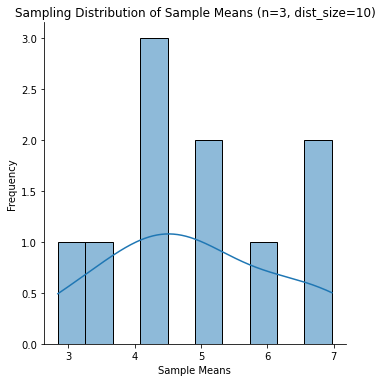

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_sample(data, n, seed):
    """Return a random sample of size n from the data with replacement."""
    np.random.seed(seed)  # Set the seed for reproducibility
    return data.sample(n=n, replace=True)

def get_sample_mean(sample):
    """Return the mean of the sample."""
    return sample.mean()

def create_sample_distribution(data, dist_size=100, n=30):
    """
    Creates a sampling distribution of sample means.

    Parameters:
    data (Series): The dataset to sample from.
    dist_size (int): The number of sample means to generate.
    n (int): The size of each individual sample.

    Returns:
    list: A list containing the sample means.
    """
    sample_means = []  # List to hold the sample means

    for i in range(dist_size):
        # Sample with replacement
        sample = get_sample(data, n, seed=i)  # Use the index as the seed for reproducibility
        sample_mean = get_sample_mean(sample)  # Calculate the mean of the sample
        sample_means.append(sample_mean)  # Append the mean to the list

    return sample_means  # Return the list of sample means

# Create a sample DataFrame
data = {'values': np.random.normal(5, 2, 100)}  # Example dataset with 100 samples
df = pd.DataFrame(data)

# Create a sampling distribution with a distribution size of 10 and sample size of 3
dist_size = 10  # Number of sample means to generate
sample_size = 3  # Size of each individual sample
sample_distribution = create_sample_distribution(df['values'], dist_size=dist_size, n=sample_size)

# Visualize the sampling distribution using displot
sns.displot(sample_distribution, bins=10, kde=True)
plt.title('Sampling Distribution of Sample Means (n=3, dist_size=10)')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()


Now, let's increase the `dist_size` to 30, and `n` to 10.  Create another visualization to compare how it changes as size increases.  

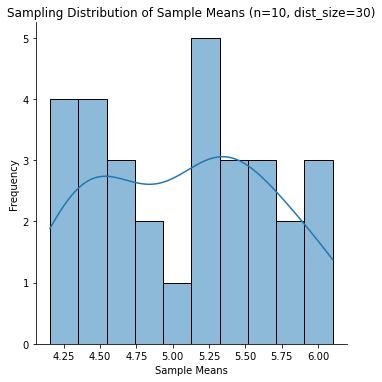

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_sample(data, n, seed):
    """Return a random sample of size n from the data with replacement."""
    np.random.seed(seed)  # Set the seed for reproducibility
    return data.sample(n=n, replace=True)

def get_sample_mean(sample):
    """Return the mean of the sample."""
    return sample.mean()

def create_sample_distribution(data, dist_size=30, n=10):
    """
    Creates a sampling distribution of sample means.

    Parameters:
    data (Series): The dataset to sample from.
    dist_size (int): The number of sample means to generate.
    n (int): The size of each individual sample.

    Returns:
    list: A list containing the sample means.
    """
    sample_means = []  # List to hold the sample means

    for i in range(dist_size):
        # Sample with replacement
        sample = get_sample(data, n, seed=i)  # Use the index as the seed for reproducibility
        sample_mean = get_sample_mean(sample)  # Calculate the mean of the sample
        sample_means.append(sample_mean)  # Append the mean to the list

    return sample_means  # Return the list of sample means

# Create a sample DataFrame
data = {'values': np.random.normal(5, 2, 100)}  # Example dataset with 100 samples
df = pd.DataFrame(data)

# Create a sampling distribution with a distribution size of 30 and sample size of 10
dist_size = 30  # Number of sample means to generate
sample_size = 10  # Size of each individual sample
sample_distribution_large = create_sample_distribution(df['values'], dist_size=dist_size, n=sample_size)

# Visualize the sampling distribution using displot
sns.displot(sample_distribution_large, bins=10, kde=True)
plt.title('Sampling Distribution of Sample Means (n=10, dist_size=30)')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()


The data is already looking much more 'normal' than the first sampling distribution, and much more 'normal' that the raw non-normal distribution we're sampling from. 

In the cell below, create another sampling distribution of `data` with `dist_size` 1000 and `n` of 30.  Visualize it to confirm the normality of this new distribution. 

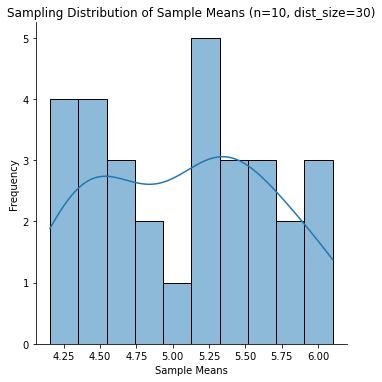

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_sample(data, n, seed):
    """Return a random sample of size n from the data with replacement."""
    np.random.seed(seed)  # Set the seed for reproducibility
    return data.sample(n=n, replace=True)

def get_sample_mean(sample):
    """Return the mean of the sample."""
    return sample.mean()

def create_sample_distribution(data, dist_size=1000, n=30):
    """
    Creates a sampling distribution of sample means.

    Parameters:
    data (Series): The dataset to sample from.
    dist_size (int): The number of sample means to generate.
    n (int): The size of each individual sample.

    Returns:
    list: A list containing the sample means.
    """
    sample_means = []  # List to hold the sample means

    for i in range(dist_size):
        # Sample with replacement
        sample = get_sample(data, n, seed=i)  # Use the index as the seed for reproducibility
        sample_mean = get_sample_mean(sample)  # Calculate the mean of the sample
        sample_means.append(sample_mean)  # Append the mean to the list

    return sample_means  # Return the list of sample means

# Create a sample DataFrame
data = {'values': np.random.normal(5, 2, 100)}  # Example dataset with 100 samples
df = pd.DataFrame(data)

# Create a sampling distribution with a distribution size of 30 and sample size of 10
dist_size = 30  # Number of sample means to generate
sample_size = 10  # Size of each individual sample
sample_distribution_large = create_sample_distribution(df['values'], dist_size=dist_size, n=sample_size)

# Visualize the sampling distribution using displot
sns.displot(sample_distribution_large, bins=10, kde=True)
plt.title('Sampling Distribution of Sample Means (n=10, dist_size=30)')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()


Great! As you can see, the dataset _approximates_ a normal distribution. It isn't pretty, but it's generally normal enough that we can use it to answer statistical questions using $z$-scores and p-values.  

Another handy feature of the Central Limit Theorem is that the mean and standard deviation of the sampling distribution should also approximate the population mean and standard deviation from the original non-normal dataset!  Although it's outside the scope of this lab, we could also use the same sampling methods seen here to approximate other parameters from any non-normal distribution, such as the median or mode!

## Summary

In this lab, we learned to apply the central limit theorem in practice. We learned how to determine if a dataset is normally distributed or not. From there, we used a function to sample with replacement and generate sample means. Afterwards, we created a normal distribution of sample means in order to answer questions about non-normally distributed datasets.  